# Exercise 2.
Group name: TAU03E

## Task 0.1

### 1)
It's known that the disease isn't fatal (i) and the births and deaths can be ignored (ii) and recovered individuals are permanently immune (iii).

Therefore, the population can be considered constant.

This can be also shown as $S'+I'+R'=\frac{dS}{dt}+\frac{dI}{dt}+\frac{dR}{dt}=-\frac{c_0SI}{N}+\left(\frac{c_0SI}{N}-c_1I\right)+c_1I=0$.
Thus, $N´(t)=0\ \forall t \Rightarrow N=\text{constant}$.

### 2)
It's known that $c_0{,}c_1>0$.
As $t\rightarrow\infty\ \Rightarrow\ S\ \rightarrow\ 0$, because $S´\left(t\right)\ \le 0\ \forall t$. The rate of change in the number of infected $I$ consists of two components: 
1. the number of individuals getting infected $\frac{c_0SI}{N}$
2. the number of individuals getting recovered $c_1I$

$I'$ can be rewritten as $I'=I\left(\frac{c_0S}{N}-c_1\right)$. Thus if $\frac{c_0S}{N}>c_1$, then $I'>0$ and the number of infected will increase. 

In the early stages of disease, where $S\approx N$, it can be written that if $c_0>c_1$ then $I'>0$.

If $c_0<c_1$, then $I'<0 \ \forall t$ as it's known that $t\rightarrow\infty\ \Rightarrow\ S\ \rightarrow\ 0$ and therefore $\frac{c_0S}{N}\rightarrow\ 0$.

However, if it's the situation that $c_0>c_1$, then $I'>0$ when $\frac{c_0S}{N}>c_1$. But as written before $t\rightarrow\infty\ \Rightarrow\ \frac{c_0S}{N}\rightarrow\ 0$.

This means that there will be a tipping point when $\frac{c_0S}{N}=c_1$ and from there on $\frac{c_0S}{N}<c_1 \Rightarrow\ I'<0$.

Consequently, $I\ \rightarrow\ 0$ as $t\rightarrow\infty$ and for that reason the disease cannot be an endemic.

### 3)
The disease can be an epidemic if $\frac{c_0S}{N}>c_1$. Otherwise, the rate of change $I'<0$.

### 4)
The product term $SI$ describes the probability well as it contains the two factors that contribute to the likelyhood: $S$ describes the number of individuals who can be infected and $I$ describes the number of individuals that can infect others.

## Task 0.2

### 5)

Let's sum the derivates $S'+I'+R'$:

$S'+I'+R'=\frac{dS}{dt}+\frac{dI}{dt}+\frac{dR}{dt}=(-\frac{c_0SI}{N}+{c_2}{R})+\left(\frac{c_0SI}{N}-c_1I\right)+c_1I-c_2R$

$=-c_0\frac{SI}{N}+c_0\frac{SI}{N}+c_2R-c_2R+c_1I-c_1I=0$.

The $S'+I'+R'$ is still constant.


### 6)

First solve $R$ from third equation at equilibrium point $R'=0$:

$c_1I-c_2R=0$  $\Rightarrow  R = \frac{c_1I}{c_2}$.

Eliminate $R$ from the first equation $S'=-c_0\frac{SI}{N}+c_2\frac{c_1I}{c_2}=-c_0\frac{SI}{N}+c_1I$.

System for $(S, I)$ is

$S'=-c_0\frac{SI}{N}+c_1I$,

$I'=c_0\frac{SI}{N}-c_1I$.

Equilibrium points are when $S'=0$ and $I'=0$,

for $I'=0$:

$I'=c_0\frac{SI}{N}-c_1I=0 \Rightarrow c_0\frac{SI}{N}=c_1I \Rightarrow c_0\frac{S}{N}=c_1$

Solve $S$:  $S=c_1\frac{N}{c_0}$.

Insert value $S$ into $S'=0$:

$S'=-c_0\frac{SI}{N}+c_1I = -c_0\frac{c_1\frac{N}{c_0}I}{N}+c_1I=-c_1I+c_1I=0$.

Solution is true so equilibrium points are $S=c_1\frac{N}{c_0}$ and $I=0$.

When $S=N, I=0$., type is disease-free, since the population is susceptible $S$ and there are no infected.

Equilibrium point $S=c_1\frac{N}{c_0}$ and $I=0$ could be endemic point where amount of susceptible has reached level $S=c_1\frac{N}{c_0}$. The endemic has occurred and there are no more infected individuals. Equilibrium point is depend on parameters. 


### 7)

Endemic means that amount of infected never approaches zero, i.e. $I \neq 0$. In our case, the equilibrium point includes $I=0$, so the disease can't be endemic.

Epidemics occur when the amount of infected increases over time, i.e. $I'>0$.
In our case:

$I'>0 \Rightarrow c_0\frac{SI}{N}>c_1I \Rightarrow S>c_1\frac{N}{c_0}$.

So, in order to epidemics occur, the number of suspectible $S$ needs to be $S>c_1\frac{N}{c_0}$, with given parameter values $c_0,c_1$. 

### 8)
Existance of periodic solutions can be check by numerically solving the system and plotting the results in a phase space plot. If there appears a limit cycle, then that's indicative of periodic solution. This can be explored by taking multiple starting points and plotting the values in respect to each other.

MATLAB code for numerically solving the system:
```
% Declare constants and ODE
function dydt = sirs(t,y)
    c0 = 0.5;
    c1 = 1/10;
    c2 = 1/100;
    c3 = 0;

    N = 1000;
    S = y(1);
    I = y(2);
    R = y(3);

    dydt = [
        c3*N-(c0*S*I)/N + c2*R - c3*S;
        (c0*S*I)/N - c1*I - c3*I;
        c1*I - c2*R - c3*R;
        ];
end

% Solve
N = 1000;
y0 = [N*0.99, N*0.01, 0];
tspan = [0 500];
[t,y] = ode45(@sirs, tspan, y0);
figure();
plot(t,y)
legend("S", "I", "R")
plot(y(:,1), y(:,2))

%Simulate multiple starting points
figure();
hold on
for s0 = 0.1:0.05:1
    y0 = [N*(1-s0), N*s0, 0];
    tspan = [0 500];
    [t,y] = ode45(@sirs, tspan, y0);
    s = y(:,1);
    i = y(:,2);
    plot(s,i)
end
hold off
```

Plot the results

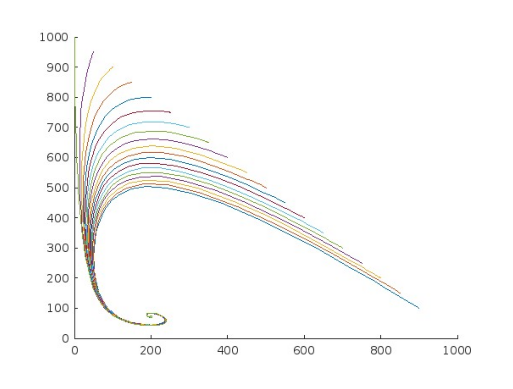

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../plots/phase_space_plot028.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

The plot shows a limit cycle which is indicative of periodic solutions.

## Task 0.3

### 1)
Let's check if $S+I+R$ is still constant. N is constant if $S'+I'+R'=\frac{dS}{dt}+\frac{dI}{dt}+\frac{dR}{dt}=0$.

However, $c_3N-\frac{c_0SI}{N}+\left(c_2R-c_3S+\frac{c_0SI}{N}-c_1I-c_3I\right)+\left(c_1I-c_2R-c_3R\right)=c_3N-c_3S-c_3I-c_3R\ne0$ as $c_3>0$.

### 2)
By eliminating $R$ from the first equation, we get resulting system for S,I:

$\begin{cases}
c_3N-\frac{c_0SI}{N}-c_3S&=c_3\left(N-S\right)-\frac{c_0SI}{N}\\
\frac{c_0SI}{N}-c_1I-c_3I&=\frac{c_0SI}{N}-I\left(c_1+c_3\right)
\end{cases}$ to solve for equilibrium points, let's set both rates to zero $\begin{cases}
c_3\left(N-S\right)-\frac{c_0SI}{N}=0\\
\frac{c_0SI}{N}-I\left(c_1+c_3\right)=0
\end{cases}$

The trivial equilibrium point is $S=N$ and $I=0$. The other equilibrium point is $S=\frac{N\left(c_0+c_3\right)}{c_0}$ and $I=-\frac{c_3^2N}{c_0\left(c_0+c_3\right)}$. However, as $c_0{,}c_3>0$, then $I<0$ which is not possible. 

Therefore the only solution is the trivial one which is hyperbolic and does not depend on parameter values.

### 3)
The previous subtask demonstrated that the system can only reach a steady state if the disease eventually dies out ($I=0$). This can be expanded to apply to the complete system as instead of $N=S \Rightarrow N=S+R$. If this state is never reached then $I$ won't approach 0 and the disease will end up in endemic state.

Epidemics can occur when $I'>0$. $I'$ can be reformulated as $I'\ =\ I\left(\frac{c_0S}{N}-c_1-c_3\right)$, which means that there is an epidemic if $\frac{c_0S}{N}>c_1+c_3$. Constant $c_0$ can be thought as the infection rate of the susceptible population, $S/N$ is portion of the whole population that are susceptible, $c_1$ is the recovery rate from the infection and $c_3$ is the mortality rate. Based on the condition, rule for epidemics is that if the number of infection rate of susceptible population is higher than combined recovery and mortality rate of the disease, then there will be an epidemic.

### 4)
### 8)
Existance of periodic solutions can be check by numerically solving the system and plotting the results in a phase space plot. If there appears a limit cycle, then that's indicative of periodic solution. This can be explored by taking multiple starting points and plotting the values in respect to each other.

MATLAB code for numerically solving the system:
```
% Declare constants and ODE
function dydt = sirs(t,y)
    c0 = 0.2;
    c1 = 1/10;
    c2 = 1/100;
    c3 = 1/1000;

    N = 1000;
    S = y(1);
    I = y(2);
    R = y(3);

    dydt = [
        c3*N-(c0*S*I)/N + c2*R - c3*S;
        (c0*S*I)/N - c1*I - c3*I;
        c1*I - c2*R - c3*R;
        ];
end

% Solve
N = 1000;
y0 = [N*0.99, N*0.01, 0];
tspan = [0 500];
[t,y] = ode45(@sirs, tspan, y0);
figure();
plot(t,y)
legend("S", "I", "R")
plot(y(:,1), y(:,2))

%Simulate multiple starting points
figure();
hold on
for s0 = 0.1:0.05:1
    y0 = [N*(1-s0), N*s0, 0];
    tspan = [0 500];
    [t,y] = ode45(@sirs, tspan, y0);
    s = y(:,1);
    i = y(:,2);
    plot(s,i)
end
hold off
```

Plot the results

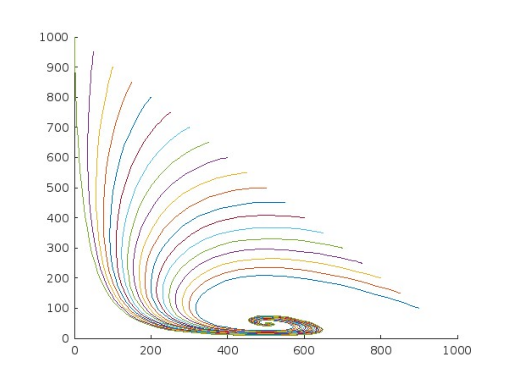

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../plots/phase_space_plot038.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

The plot shows a limit cycle which is indicative of periodic solutions.